### Implementation of logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#read dataset
df1 = pd.read_csv('titanic_train.csv')

In [5]:
df1.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [13]:
#take a random sample of 20 data points.
df1_sample = df1.sample(n=20)
#selecting relevant columns and dividing into input and target values.
xtrain = df1.loc[:,('Pclass','Sex','Age','Fair')]
ytrain = df1.loc[:,('Survived')]

KeyError: "['Fair'] not in index"

In [ ]:
# z = np.arange(-20, 20)
# gz = 1/(1 + np.exp(-z))
# np.c_[z, gz]

In [12]:
t1 = np.array([[1,2,3,4],[40,50,60,90],[71,81,91,101]])

In [18]:
#computes mean of each row
#np.mean(t1, axis = 1)
#computes mean of each column
mean_n = np.mean(t1, axis = 0)
#compute standard deviation of each column
sd_n = np.std(t1, axis = 0)

In [19]:
t2 = (t1 - mean_n)/sd_n
t2


array([[-1.26864315, -1.30258123, -1.32620719, -1.40661072],
       [ 0.09311142,  0.17436127,  0.23780267,  0.5764798 ],
       [ 1.17553172,  1.12821996,  1.08840452,  0.83013091]])

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(z, gz, c = "red")
# ax.axvline(x = 0, c = "b", ymin = min(gz), ymax = max(gz), linestyle = ":")
# plt.show()

In [17]:
x0 = np.arange(0, 6)
x1 = 3 - x0
np.c_[x0, x1]

array([[ 0,  3],
       [ 1,  2],
       [ 2,  1],
       [ 3,  0],
       [ 4, -1],
       [ 5, -2]])

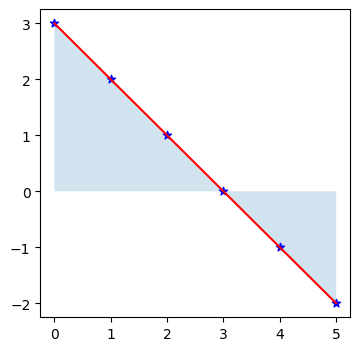

In [21]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x0, x1, c = "r")
ax.fill_between(x0, x1, alpha= 0.2)
ax.scatter(x0, x1, c = "blue", marker = "*")
plt.show()

In [2]:
#function to compute logistic cost
def compute_log_cost(xtrain, ytrain, w, b, reg_coeff):
    """
    Objective- Compute and return the logistic cost
    Arguments-
    xtrain (2-D matrix)- training samples
    ytrain (1-D array)- target outputs
    w (1-D array)- weights parameter
    b (scalar)- bias
    reg_coeff- regularization coefficient lambda
    """
    m, n = xtrain.shape
    cost = 0.0
    reg = 0.0
    for i in range(m):
        fx = np.dot(xtrain[i],w) + b
        gz = sigmoid(fx)
        loss = ytrain[i]*np.log(gz) + (1 - ytrain[i])*np.log(1 - gz)
        cost = cost + loss
    
    #calculating regularization term
    for j in range(n):
        reg = reg + w[j]**2
    
    reg = reg * (reg_coeff
    total_cost = (cost + reg)/(2*m)
    return total_cost


In [3]:
#function to compute gradient
def compute_gradient(xtrain, ytrain, w, b):
    m,n = xtrain.shape
    dj_dw, dj_db = [], []
    for i in range(m):
        fx = np.dot(xtrain[i], w) + b
        gz = sigmoid(fx)
        err = gz - ytrain[i]
        for j in range(n):
            dj_dw[j] = dj_dw + err*xtrain[i][j]
        dj_dw = dj_dw + err
    #average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(xtrain, ytrain,w, b, alpha, iters, reg_coeff, compute_cost, compute_gradient):
    w_in, b_in = w, b
    J_history, w_history, b_history = [], [] ,[]
    #regularization constant.
    reg_term = 1 - alpha*(reg_coeff/m)
    for i in range(iters):
        
        #compute gradient
        dj_dw, dj_db = compute_gradient(xtrain, ytrain, w_in, b_in)
        #simultaneous update
        w_in = w_in*reg_term - alpha*dj_dw
        b_in = b_in - dj_db
        
        #save cost and parameters history
        if i < 100000:
            J_history.append(compute_cost(xtrain, ytrain, w, b))
            w_history.append(w_in)
            b_history.append(b_in)
        
    return J_history, w_history, b_history, w_in, b_in

In [ ]:
#sigmoid function
def sigmoid(x):
    """
    Objective- compute the sigmoid value of given input
    Argument- x (scalar/1-d array)- training sample(s)
    Returns- scalar/1-d vector of sigmoid values.
    """

    gz = 1/(1 + np.exp(-x))
    
    return gz

In [ ]:
#normalize the dataset
def normalize(df):
    """
    Objective- normalize the given dataframe.
    Argument- df (1-d array)
    Return- normalized dataframe, normalizing mean and standard deviation
    """
    norm_mean = np.mean(df)
    norm_sd = np.std(df)
    norm_df = (df - norm_mean)/norm_sd
    
    return norm_mean, norm_sd, norm_df

In [ ]:
#Training datasets
#features
xtrain = np.array([])
ytrain = np.array([])

In [ ]:
#Some other initializations
alpha = 0.01
lambda_ = 0.001
w = np.zeros(xtrain.shape[1])
b = 0
iters = 100

In [ ]:
#call to gradient descnet
J_history, w_history, b_history, final_w, final_b = gradient_descent(xtrain, ytrain,w, b, 
                                                                     alpha, iters, lambda_, compute_cost, compute_gradient)

In [ ]:
#Equation for descision boundary.